In [ ]:
# prompt: import numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Telco_Customer_Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


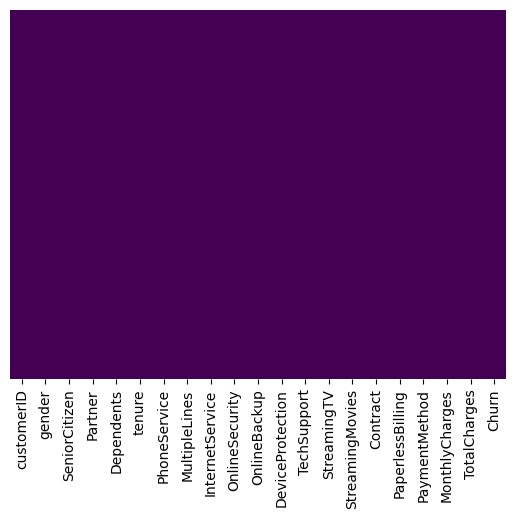

In [ ]:
# prompt: missing values

import matplotlib.pyplot as plt
# Check for missing values
df.isnull().sum()

# Visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


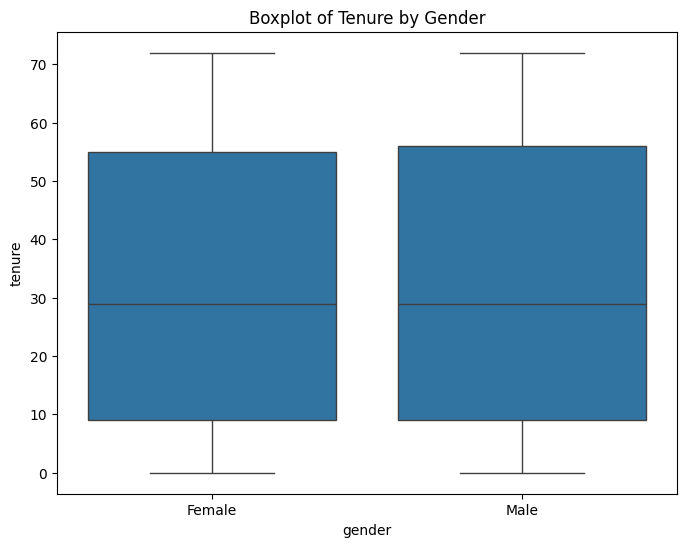

In [ ]:
# prompt: boxplot for gender and tenure

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='tenure', data=df)
plt.title('Boxplot of Tenure by Gender')
plt.show()


In [ ]:
# prompt: Drop customerID

df = df.drop('customerID', axis=1)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# prompt: Encoding

# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


Accuracy: 0.8133427963094393
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
[[935 101]
 [162 211]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


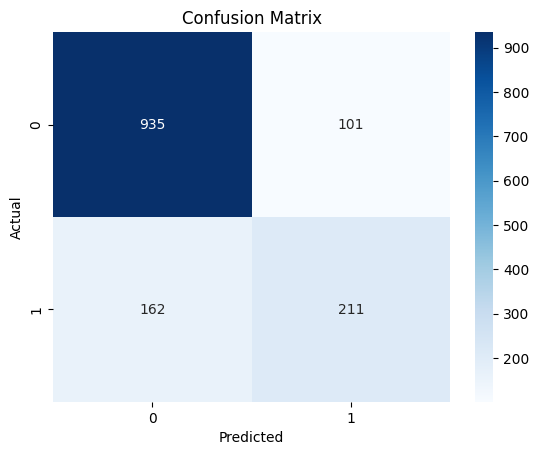

In [ ]:
# prompt: logistic Regression

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix (optional)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.score(X_train, y_train)

0.7983670571529996

In [ ]:
model.score(X_test, y_test)

0.8133427963094393

In [ ]:
# prompt: what is the False negative and False positive in above

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (Your existing code)

# ... (Model training and prediction)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


Confusion Matrix:
[[935 101]
 [162 211]]
True Negatives (TN): 935
False Positives (FP): 101
False Negatives (FN): 162
True Positives (TP): 211


In [ ]:
df.shape

(7043, 20)

In [ ]:
7043*.2

1408.6000000000001

In [ ]:
1409

1409

In [ ]:
# prompt: classification report

from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined from your model's prediction

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
# prompt: calculate precision

from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined from your model's prediction

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Extract precision from the classification report (example for class 0)
lines = class_report.split('\n')
for line in lines[2:-3]:  # Iterate through lines containing class information
    parts = line.split()
    if len(parts) > 0:  # Check if the line is not empty
        class_label = parts[0]  # Extract the class label (e.g., '0' or '1')
        precision = float(parts[1])  # Extract the precision value

        print(f"Precision for class {class_label}: {precision}")


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Precision for class 0: 0.85
Precision for class 1: 0.68
Precision for class accuracy: 0.81


In [ ]:
# prompt: calculate accuracy

# Assuming y_test and y_pred are already defined from your model's prediction

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8133427963094393


In [ ]:
# prompt: calculate recall

# Assuming y_test and y_pred are already defined from your model's prediction

from sklearn.metrics import recall_score

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Recall: 0.5656836461126006


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/BankReviews.xlsx")

In [ ]:
df.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [ ]:
# prompt: drop Date and BankName

df = df.drop(['Date', 'BankName'], axis=1)


In [ ]:
df.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [ ]:
# prompt: display 10 records

print(df.head(10))


   Stars                                            Reviews
0      5  Great job, Wyndham Capital! Each person was pr...
1      5  Matthew Richardson is professional and helpful...
2      5  We had a past experience with Wyndham Mortgage...
3      5  We have been dealing with Brad Thomka from the...
4      5  I can't express how grateful I am for the supp...
5      5  I had the pleasure of working with Wyndham Cap...
6      5  My experience with Mattison was beyond greatly...
7      5  Patrick answered all my questions by email imm...
8      5  I loved working with this group of people! The...
9      5  Great web interface for both the loan applicat...


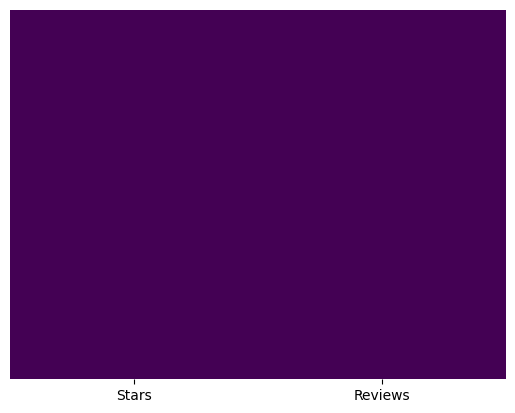

In [ ]:
# prompt: any missing values

import matplotlib.pyplot as plt
# Check for missing values
df.isnull().sum()

# Visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


In [ ]:
# prompt: do sentiment analysis


from textblob import TextBlob

# Assuming 'df' is your DataFrame with a 'Reviews' column
# Example usage:
for index, row in df.iterrows():
    review = row['Reviews']
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity

    print(f"Review: {review}")
    print(f"Polarity: {polarity}")  # Polarity ranges from -1 (negative) to 1 (positive)
    print(f"Subjectivity: {subjectivity}")  # Subjectivity ranges from 0 (objective) to 1 (subjective)
    print("---")


Review: Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!
Polarity: 0.5333333333333333
Subjectivity: 0.45
---
Review: Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!
Polarity: 0.4533333333333333
Subjectivity: 0.4533333333333333
---
Review: We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind
Polarity: -0.0332308201058201
Subjectivity: 0.5213756613756613
---
Review: We have been dealing with Brad Th

In [ ]:
# prompt: create a new column Reviews_clean and convert the Reviews to lower case

df['Reviews_clean'] = df['Reviews'].str.lower()


In [ ]:
# prompt: remove punctuation marks from Reviews_clean

import string

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df['Reviews_clean'] = df['Reviews_clean'].apply(lambda x:remove_punctuation(x))
print(df.head())


   Stars                                            Reviews  \
0      5  Great job, Wyndham Capital! Each person was pr...   
1      5  Matthew Richardson is professional and helpful...   
2      5  We had a past experience with Wyndham Mortgage...   
3      5  We have been dealing with Brad Thomka from the...   
4      5  I can't express how grateful I am for the supp...   

                                       Reviews_clean  
0  great job wyndham capital each person was prof...  
1  matthew richardson is professional and helpful...  
2  we had a past experience with wyndham mortgage...  
3  we have been dealing with brad thomka from the...  
4  i cant express how grateful i am for the suppo...  


In [ ]:
# prompt: remove whitespaces from Reviews_clean

df['Reviews_clean'] = df['Reviews_clean'].str.strip()
print(df.head())


   Stars                                            Reviews  \
0      5  Great job, Wyndham Capital! Each person was pr...   
1      5  Matthew Richardson is professional and helpful...   
2      5  We had a past experience with Wyndham Mortgage...   
3      5  We have been dealing with Brad Thomka from the...   
4      5  I can't express how grateful I am for the supp...   

                                       Reviews_clean  
0  great job wyndham capital each person was prof...  
1  matthew richardson is professional and helpful...  
2  we had a past experience with wyndham mortgage...  
3  we have been dealing with brad thomka from the...  
4  i cant express how grateful i am for the suppo...  


In [ ]:
# prompt: import nltk
#   and nltk.download('punkt_tab')

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# prompt: Tokenization in Reviews_clean

import nltk

# Download the necessary data for tokenization
nltk.download('punkt_tab')  # Download the 'punkt_tab' resource

from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame with a 'Reviews_clean' column

# Example usage:
for index, row in df.iterrows():
    review = row['Reviews_clean']
    tokens = word_tokenize(review)
    print(f"Review: {review}")
    print(f"Tokens: {tokens}")
    print("---")

Review: great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you
Tokens: ['great', 'job', 'wyndham', 'capital', 'each', 'person', 'was', 'professional', 'and', 'helped', 'us', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'thank', 'you']
---
Review: matthew richardson is professional and helpful he helped us find the correct product for our mortgage thank you very much for the excellent service matthew
Tokens: ['matthew', 'richardson', 'is', 'professional', 'and', 'helpful', 'he', 'helped', 'us', 'find', 'the', 'correct', 'product', 'for', 'our', 'mortgage', 'thank', 'you', 'very', 'much', 'for', 'the', 'excellent', 'service', 'matthew']
---
Review: we had a past experience with wyndham mortgage and would without question use again and again if needed wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan but they pulled together and

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Review: x000d
jason chandler and his team worked so hard to ensure that we were able to purchase our beautiful home  i cant explain how difficult our situation was and everything that couldve possibly went wrong managed to go wrong  we were so frustrated  jason kept us on the right track and helped us resolve all our issues and was able to close our loan  we will forever be grateful for him and his team  thank you guys  i defiantly recommend this company to everyone needing a home loan read morex000d
Tokens: ['x000d', 'jason', 'chandler', 'and', 'his', 'team', 'worked', 'so', 'hard', 'to', 'ensure', 'that', 'we', 'were', 'able', 'to', 'purchase', 'our', 'beautiful', 'home', 'i', 'cant', 'explain', 'how', 'difficult', 'our', 'situation', 'was', 'and', 'everything', 'that', 'couldve', 'possibly', 'went', 'wrong', 'managed', 'to', 'go', 'wrong', 'we', 'were', 'so', 'frustrated', 'jason', 'kept', 'us', 'on', 'the', 'right', 'track', 'and', 'helped', 'us', 'resolve', 'all', 'our', 'issues',

In [ ]:
# prompt: Remvove Stop words from Reviews_clean

import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    return " ".join(filtered_tokens)

df['Reviews_clean'] = df['Reviews_clean'].apply(lambda x: remove_stopwords(x))
print(df.head())


   Stars                                            Reviews  \
0      5  Great job, Wyndham Capital! Each person was pr...   
1      5  Matthew Richardson is professional and helpful...   
2      5  We had a past experience with Wyndham Mortgage...   
3      5  We have been dealing with Brad Thomka from the...   
4      5  I can't express how grateful I am for the supp...   

                                       Reviews_clean  
0  great job wyndham capital person professional ...  
1  matthew richardson professional helpful helped...  
2  past experience wyndham mortgage would without...  
3  dealing brad thomka beginning started stressfu...  
4  cant express grateful support zach provided fa...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: Lemmatization in Reviews_clean

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_tokens)

df['Reviews_clean'] = df['Reviews_clean'].apply(lambda x: lemmatize_text(x))
print(df.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Stars                                            Reviews  \
0      5  Great job, Wyndham Capital! Each person was pr...   
1      5  Matthew Richardson is professional and helpful...   
2      5  We had a past experience with Wyndham Mortgage...   
3      5  We have been dealing with Brad Thomka from the...   
4      5  I can't express how grateful I am for the supp...   

                                       Reviews_clean  
0  great job wyndham capital person professional ...  
1  matthew richardson professional helpful helped...  
2  past experience wyndham mortgage would without...  
3  dealing brad thomka beginning started stressfu...  
4  cant express grateful support zach provided fa...  


In [ ]:
# prompt: count of most frequent words

from collections import Counter

# Assuming 'df' is your DataFrame and 'Reviews_clean' is the column with cleaned reviews
# Combine all reviews into a single string
all_reviews = ' '.join(df['Reviews_clean'])

# Tokenize the combined string
tokens = word_tokenize(all_reviews)

# Count word frequencies
word_counts = Counter(tokens)

# Get the most frequent words (e.g., top 10)
most_common_words = word_counts.most_common(10)

most_common_words


[('x000d', 713),
 ('loan', 326),
 ('process', 248),
 ('would', 246),
 ('time', 217),
 ('u', 207),
 ('home', 194),
 ('read', 190),
 ('morex000d', 187),
 ('mortgage', 151)]

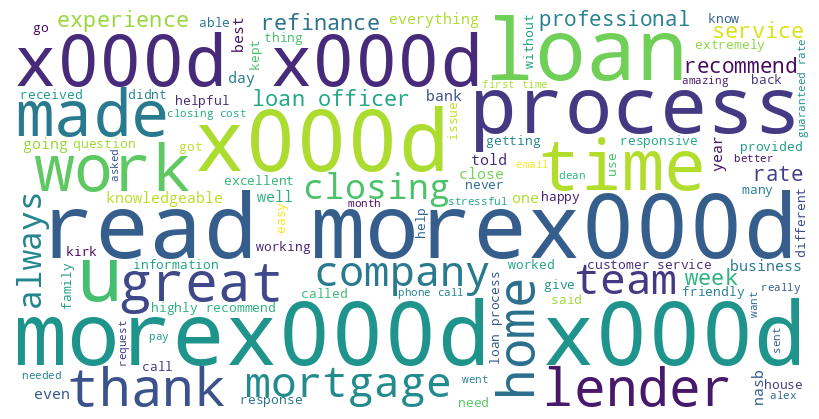

In [ ]:
# prompt: word cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['Reviews_clean'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# prompt: vectorizer -> count ->

from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame and 'Reviews_clean' is the column with cleaned reviews
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Reviews_clean'])

# Now X is a document-term matrix where each row represents a review
# and each column represents a word (feature). The values are the word counts.

# You can convert this to a dense array if needed:
X_dense = X.toarray()
print(X_dense)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()
feature_names


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array(['10', '100', '101', ..., 'zach', 'zelada', 'zero'], dtype=object)

In [ ]:
# prompt: ML models(any 3) ->

# ... (Your existing code)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Random Forest Accuracy: 0.7984386089425124
SVM Accuracy: 0.7352732434350603
Decision Tree Accuracy: 0.7274662881476224


In [ ]:
# prompt: ML models(any 3) ->

# ... (Your existing code)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import accuracy_score


# Assuming 'X' and 'y' are your feature and target data respectively (from previous steps)
# You might need to adjust 'X' and 'y' based on your data preparation

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Stars'], test_size=0.2, random_state=42) # Added this line to define X_train, X_test, y_train, y_test

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Random Forest Accuracy: 0.9504950495049505
SVM Accuracy: 0.9108910891089109
Decision Tree Accuracy: 0.9108910891089109


In [ ]:
# prompt: confusion matrix -> highest

import numpy as np
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Assuming X and y are defined from previous steps
X_train, X_test, y_train, y_test = train_test_split(X, df['Stars'], test_size=0.2, random_state=42) # Split data

# Assuming you have a trained model (e

In [ ]:
# prompt: confusion matrix -> highest

import numpy as np
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Assuming X and y are defined from previous steps
X_train, X_test, y_train, y_test = train_test_split(X, df['Stars'], test_size=0.2, random_state=42) # Split data

# Assuming you have a trained model (e.g., rf


In [ ]:
# prompt: confusion matrix -> highest

import numpy as np
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Assuming X and y are defined from previous steps
X_train, X_test, y_train, y_test = train_test_split(X, df['Stars'], test_size=0.2, random_state=42) # Split data

# Assuming you have a trained model (e.g., rf_model, svm_model, or dt_model)
# Choose one of the models and assign its predictions to y_pred
y_pred = rf_model.predict(X_test)  # Example using Random Forest

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Find the highest value in the confusion matrix
highest_value = np.max(conf_matrix)
print(f"\nHighest value in the confusion matrix: {highest_value}")

# Find the indices (row, col) of the highest value
row, col = np.unravel_index(np.argmax(conf_matrix), conf_matrix.shape)
print(f"Indices of the highest value (row, col): ({row}, {col})")


Confusion Matrix:
[[16  5]
 [ 0 80]]

Highest value in the confusion matrix: 80
Indices of the highest value (row, col): (1, 1)


In [ ]:
pip install gradio

In [ ]:
# prompt: gradio for the above sentiment analysis

import gradio as gr

def predict_sentiment(review):
    # Preprocess the input review (similar to your existing preprocessing steps)
    review = review.lower()
    review = "".join([i for i in review if i not in string.punctuation])
    review = review.strip()
    tokens = word_tokenize(review)
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    review = " ".join(filtered_tokens)
    review = lemmatize_text(review)

    # Vectorize the preprocessed review
    review_vector = vectorizer.transform([review])

    # Predict using your trained model (e.g., rf_model)
    prediction = rf_model.predict(review_vector)[0]

    # Return the prediction
    return prediction


iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter a bank review here..."),
    outputs="text",
    title="Bank Review Sentiment Analysis",
    description="Enter a bank review to get its sentiment prediction.",
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bef133da1fcf99343c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
